# <center>MSDS 7333 - Quantifying the World</center>
## <center>Case Study 8 - Textbook problem 7 </center>


<center> <b> Hari Narayan Sanadhya, Asha Saxena, John Heinen</b> </center>
<center>September 24, 2018</center>
<br>

### Abstract
In this case study we are reviewing the data for the race results from the annual Cherry Blossom Ten Mile Run for the years 1999 through 2012 for the female runners. Critical step before we start data analysis is to clean the raw data, reformat and prepare the available data set to start visualizing and then building models to create insights.

### Introduction
This case study contains the data set for the race times for female runners in the Cherry Blossom Ten Mile Run held in Washington DC, from 1999 through 2012 and was obtained from www.cherryblossom.org. The data set contains one text file for each year, and it contains variables such as name, hometown, age, gun time, and net time. Not all files follow the same format or contain the same set of variables. 
The objective of this case study is to answer Question 7 in the chapter 2 of “Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving” (Nolan and Lang). We are required to perform data cleaning process for the women’s race results data, working with any oddities that may be present in the raw data files, and build a data frame that enable us to perform data analysis for optimal results. The code in this case study is based on the code in the Nolan and Lang book.
Data Cleansing is essential in analyzing the data set at hand. The very first step in analyzing the data is preparing the data for analysis. Evaluating the quality of data, which means checking and cleaning the “dirty” data, and processing data into the format you need is critical. During the first step of preparation, looking at missing values, redundant or corrupt values and if not formatted, normalized or corrected can cause issues in getting the results that can provide insights for the analyst. 

### Methods
The data set contained year by year text files containing race data, and the text files are not formatted the same way from each year. Some years have additional columns and the headers differ from year to year. We need to develop a way to determine where the data begins and what columns each file contains. We start by the following steps (as shown in Figure 1 below):<br>
&nbsp;&nbsp;&nbsp;&nbsp;Step 1 – Get the working code for mens data obtained from the textbook that "reads the data from the website, cleans the data to get rid of any abnormalities and then create data frame from that dataset".<br>
&nbsp;&nbsp;&nbsp;&nbsp;Step 2 – Get the URL’s of all the 10 mile order of finish results for women from year 1999 to 2012. We used the website http://www.cherryblossom.org/aboutus/results_list.php to get the urls.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Step 3 – Apply the code written for men’s to the women’s data URL’s and look for the outcomes. Based on the outcome, enhance the men’s code to handle women’s data. This will make the code generalized and reusable.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Step 4- After cleansing the women’s data, create a single dataframe that contains all the women’s data combined together. 
<table class="image">
<caption align="bottom">Figure 1 - Process Flowchart</caption>
<tr><td><img src='Images/flowchart.png' height="250" width="350" ></td></tr>
</table>

### Results

### Step 1 - Working Mens data code
Here we are using the code from the text to bring in the Men's Cherry Blossom Run results for 1999 - 2012.  The code is stored in an R file in order to minimize the amount of code displayed here.  We will modify code as necessary later in order to make sure we bring in the Women's results properly.

This R code is included in this workbook in the end in the appendix section.<br>
[Jump to the Appendix A](#Appendix_A)

In [3]:
# Reference code stored in R file to bring in Men's Cherry Blossom Results
source("Mens_code.R")

In [4]:
# Reference to website that contains race results, used for scraping the web at the URL locations
ubase <- "http://www.cherryblossom.org/"
years <- 1999:2012

# URL extensions that contain the Men's results for 1999 - 2012.  These are corrected from stale code provided by text
menURLs <- c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html", 
             "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
             "results/2004/men.htm", "results/2005/CB05-M.htm",
             "results/2006/men.htm", "results/2007/men.htm", 
             "results/2008/men.htm", "results/2009/09cucb-M.htm",
             "results/2010/2010cucb10m-m.htm", 
             "results/2011/2011cucb10m-m.htm",
             "results/2012/2012cucb10m-m.htm")

# Combine base url with results extensions to create complete Men's results URL's
urls_m <- paste(ubase, menURLs, sep = "")

# Create text files with Men's results
menTables <- mapply(extractResTable, url = urls_m, year = years, men = T, 
                    file = paste(years, ".txt", sep = ""))
names(menTables) <- years

In [5]:
# Store Men's results text files in MexTxt directory within working directory
mfilenames <- paste("MenTxt/", 1999:2012, ".txt", sep="")
menFiles <- lapply(mfilenames, readLines)
names(menFiles) <- 1999:2012

menResMat <- mapply(extractVariables, menFiles, year = 1999:2012)

# Display the number of rows in each file by year
sapply(menResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3016 3561 3723 3946 4156 4324 5235 5274 5905 6649 6909 7011 7193

In [6]:
# Create combined Men's result data frame
menDF <- mapply(createDF, menResMat, year = 1999:2012, sex = "M", SIMPLIFY = F)
# Create combined Men's result file to be stored in working directory
combMen <- do.call(rbind, menDF)

[1] "Dropping the following records in year 2001 for Men due to invalid times"
                    name                     home                       ag 
"Peter HUI             "    "Silver Spring MD   "                    "70 " 
                     gun                      net                     time 
                      ""                  "1:30:"                       NA 


In [7]:
# Check combined Men's results summary statistics
rbind(summary(combMen))

,year,sex,name,home,age,runTime
,Min. :1999,Length:70070,Length:70070,Length:70070,Min. : 0.00,Min. : 45.25
,1st Qu.:2004,Class :character,Class :character,Class :character,1st Qu.:30.00,1st Qu.: 77.23
,Median :2007,Mode :character,Mode :character,Mode :character,Median :37.00,Median : 86.53
,Mean :2007,NA,NA,NA,Mean :38.61,Mean : 87.48
,3rd Qu.:2010,NA,NA,NA,3rd Qu.:46.00,3rd Qu.: 96.60
,Max. :2012,NA,NA,NA,Max. :89.00,Max. :175.60
,NA,NA,NA,NA,NA's :21,NA's :1


### Step 2 - Get Women's Results URLs
Here we have gathered the URLs for the 1999 - 2012 Cherry Blossom Run results for Women.  We will apply same methods for data cleansing as we did to Men's results, hoping that the same code will cleanse the Women's data properly.

In [8]:
# Identified Women's Cherry Blossom Run Results for 1999-2012 from the Cherry Blossom website.
womURLS <- c("results/1999/cb99f.html", "results/2000/Cb003f.htm", "results/2001/oof_f.html", 
             "results/2002/ooff.htm", "results/2003/CB03-F.HTM",
             "results/2004/women.htm", "results/2005/CB05-F.htm",
             "results/2006/women.htm", "results/2007/women.htm", 
             "results/2008/women.htm", "results/2009/09cucb-F.htm",
             "results/2010/2010cucb10m-f.htm", 
             "results/2011/2011cucb10m-f.htm",
             "results/2012/2012cucb10m-f.htm")

### Step 3 - Apply code used for Men's files to Women's files and generalize the code where necessary.
Here we are using the code we used to create the Men's Results files and will make sure that the data has been cleansed properly.  We will make any adjustments as necessary to generalize the code so that it will work on both the Men and Women Results.

In [11]:
# Apply the same code for men to womens data
urls_w <- paste(ubase, womURLS, sep = "")
womTables <- mapply(extractResTable, url = urls_w, year = years, men = F,
                    file = paste(years, ".txt", sep = ""))
names(womTables) <- years

# Display the number of rows in each file by year
sapply(womTables, length)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2358 2168 2972 3336 3544 3905 4339 5441 5696 6402 8328 8858 9035 9735

In [12]:
# Check the Women's Data Header Records
print("WOMENS DATA HEADER RECORDS")
print(lapply(womTables, function(x) x[1:7]))

[1] "WOMENS DATA HEADER RECORDS"
$`1999`
[1] "PLACE DIV /TOT  NAME                  AG HOMETOWN           TIME    PACE  "
[2] "===== ========= ===================== == ================== ======= ===== "
[3] "    1    1/1683 Jane Omoro            26 Kenya                53:37  5:22 "
[4] "    2    2/1683 Jane Ngotho           29 Kenya                53:38  5:22 "
[5] "    3           Lidiya Grigoryeva        Russia               53:40  5:22 "
[6] "    4    3/1683 Eunice Sagero         20 Kenya                53:55  5:24 "
[7] "    5    4/1683 Alla Zhilyayeva       29 Russia               54:08  5:25 "

$`2000`
[1] "PLACE DIV /TOT  NUM   NAME                  AG HOMETOWN           GUN TIM  NET TIM "
[2] "===== ========= ===== ===================== == ================== =======  ======= "
[3] "    1    1/1503  7005 Teresa Wanjiku        25 Kenya                55:53#   55:50 "
[4] "    2    2/1503  7001 Jane Omoro            27 Kenya                55:58#   55:56 "
[5] "    3    3/1503  7

On looking at the output above, womens data for all the years looks good except for year 2001 where there is no header record and it does not have the line having '===' which is used as an indicator for beginning of data in the dataset.

So before going further look into mens data for year 2001 to verify if the mens data had the same issue. If yes, then in that case, we are fine. Else some code verification would be required.

In [13]:
# Check the 2001 Men's Result Header to see if same issue as Women's 2001 Results
print(head(menTables$'2001', 7))

[1] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"     
[2] "===== ===== ===================== == ================== ======= =======" 
[3] "    1     4 John KORIR            26 Kenya                46:12   46:12#"
[4] "    2     1 Reuben CHERUIYOT      27 Kenya                46:11   46:13#"
[5] "    3     3 Evans RUTTO           23 Kenya                46:26   46:26#"
[6] "    4    19 Enock MITEI           21 Kenya                46:37   46:39#"
[7] "    5     2 Felix LIMO            21 Kenya                46:40   46:41#"


Keeping in mind that womens 2001 data has issues, lets move forward.

In [14]:
# Check the Women's Footer Records
print("WOMENS DATA FOOTER RECORDS")
print(lapply(womTables, function(x) tail(x,3)))

[1] "WOMENS DATA FOOTER RECORDS"
$`1999`
[1] " 2354 1681/1683 Maria Walsh           30 New York NY        2:23:46 14:23 "
[2] " 2355 1682/1683 Jane Mcclellan        36 Phoenix AZ         2:26:14 14:38 "
[3] " 2356 1683/1683 Kathleen Obert        37 Alexandria VA      2:45:18 16:32 "

$`2000`
[1] " 2164  180/180   8703 Kathleen Martin       45 Rockville MD       2:27:41  2:24:35 "
[2] " 2165 1503/1503  8996 Kathy Obert           38 Alexandria VA      2:38:27  2:38:27 "
[3] " 2166    2/2     8564 Sister Maria          75 Washington DC      2:47:43  2:47:43 "

$`2001`
[1] " 2970  9026 Alicia HOSMER         35 Bethesda MD        2:30:52 2:30:52"
[2] " 2971  6658 Kathy OBERT           39 Alexandria VA      2:35:17 2:35:17"
[3] " 2972  8006 Tonya MCCLARY         32 Fort Washington MD 2:41:01 2:41:01"

$`2002`
[1] " 3332  7045 Joyce KIRKSEY         41 Alexandria VA      2:30:08 2:30:08 "
[2] " 3333  8016 Gail SUMMERS          39 Lafayette IN       2:38:58 2:38:58 "
[3] " 3334  7100 Rebecca PE

There appears to be no issues to the womens footer data that we noticed by printing a few records.

In [15]:
# Create the Women's results text files and store in WomenTxt directory on Working directory
wfilenames <- paste("WomenTxt/", 1999:2012, ".txt", sep="")
womenFiles <- lapply(wfilenames, readLines)
names(womenFiles) <- 1999:2012

womenResMat <- mapply(extractVariables, womenFiles, year = 1999:2012)

# Display results of rows per file by year
sapply(womenResMat, nrow)

ERROR: Error in 1:eqIndex: argument of length 0


The above error is because there is no header record in the 2001 file for women.  We will correct the extractVariables function to account for the issue with the 2001 file for women.

In [16]:
# The function that is required to be corrected is extractVariables

extractVariables <- function(file, varNames = c("name", "home", "ag", "gun", "net", "time"),
                            sex, year) {
#' Create a data frame which contains the variables given by the varNames parameter and the data is extracted from data contained in the param file which is a list of string.
#'
#' \code{extractVariables} returns a dataframe.
#'
#' @param file - A list of Strings containing all the data records
#' @param varNames - The name of the columns corresponding to which data is contained in file parameter.
#' @param sex - To identify if the data contains men or womens data. 'M' if sex is male otherwise 'W' for women
#' @param year - year of the result of the cherry blossom race corresponding to which the data is present in the file parameter.
#' @return a data frame with columns as mentioned in the varNames parameter.
#'
#'
    if(sex == "W" & year == 2001){
        # women's file for 2001 does not contain spacer or header rows
        body <- file
        locCols<-matrix(c(13, 34, 38, 56, 35, 37, 65, 72, 57, 64, NA, NA), nrow = 2)
        colnames(locCols) <- varNames
        
    } else {
        #Find the index of the row with equal signs
        eqIndex <- grep("^===", file)    
        
        #Extract the two key rows and the data (fix men 2006 spacer row)
        spacerRow <- file[eqIndex]
        headerRow <- tolower(file[eqIndex - 1])
        
        if (year == 2006){
            locNetTime <- regexpr("net", headerRow)
            spacerRow <- paste(substr(spacerRow, 1, locNetTime - 2), 
                               substr(spacerRow, locNetTime, nchar(spacerRow)), "")
        }
        
        
        body <- file[-c(1:eqIndex)]
        
        #Obtain the starting and ending positions of variables
        searchLocs <- findColLocs(spacerRow)
        locCols <- selectCols(varNames, headerRow, searchLocs)
    }
    
    Values <- mapply(substr, list(body), start = locCols[1,], stop = locCols[2,])
    colnames(Values) <- varNames
    
    invisible(Values)
}

After correcting the extractVariables function to account for the 2001 file issue, we will now reattempt to create the Women's result files and store in a directory WomenTxt in the working Directory.

In [17]:
# Create the Women's results text files and store in WomenTxt directory on Working directory
wfilenames <- paste("WomenTxt/", 1999:2012, ".txt", sep="")
womenFiles <- lapply(wfilenames, readLines)
names(womenFiles) <- 1999:2012

womenResMat <- mapply(extractVariables, womenFiles, year = 1999:2012, sex='W')

# Display results of rows per file by year
sapply(womenResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2356 2166 2972 3334 3542 3899 4333 5435 5690 6397 8323 8853 9030 9730

### Step 4 - Create single data frame with combined Women's data
After cleansing the women’s data, we create a single dataframe that contains all the women’s data combined together.

In [18]:
# Create combined Women's result data frame
womenDF <- mapply(createDF, womenResMat, year = 1999:2012, sex = "F", SIMPLIFY = F)
# Create combined Women's result file to be stored in working directory
combWomen <- do.call(rbind, womenDF)

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
“NAs introduced by coercion”

In [19]:
# Check combined Women's results summary statistics
rbind(summary(combWomen))

,year,sex,name,home,age,runTime
,Min. :1999,Length:75972,Length:75972,Length:75972,Min. : 0.00,Min. : 51.73
,1st Qu.:2005,Class :character,Class :character,Class :character,1st Qu.:27.00,1st Qu.: 88.53
,Median :2008,Mode :character,Mode :character,Mode :character,Median :32.00,Median : 97.33
,Mean :2007,NA,NA,NA,Mean :33.85,Mean : 98.09
,3rd Qu.:2010,NA,NA,NA,3rd Qu.:39.00,3rd Qu.:106.78
,Max. :2012,NA,NA,NA,Max. :87.00,Max. :177.52
,NA,NA,NA,NA,NA's :21,NA


The above output shows that there are some missing age values (21 rows) in the table along with some records with age of 0 which does not make sense. So lets look into the raw records to get some idea regarding why the data is having missing or zero value in the age column.

In [20]:
# Print the records having the missing age or zero age from the file 

# Get the index of the records having the issues in age
missing_age_index <- rownames(combWomen[is.na(combWomen$age) | combWomen$age<5,])

# Since the row index is in the form of year.index, separate year and index values in separate list
data_rcd_year <- lapply(missing_age_index, function(x) as.numeric(substr(x, 1, regexpr('\\.', x) -1)))
data_rcd_index <- lapply(missing_age_index, function(x) as.numeric(substr(x, regexpr('\\.', x) +1 , nchar(x))))
                         
# Initialize the previous year as zero and index_to_print as a blank list
prevYear <- 0
index_to_print <- c()

for(rcdCounter in 1:length(data_rcd_year)){
    if(data_rcd_year[rcdCounter] == as.numeric(prevYear)){
        index_to_print[length(index_to_print)+1] <- c(data_rcd_index[rcdCounter])
    }else{
        if(prevYear!=0){
            if(prevYear==2001){ # 2001 file for women does not have header column
                headerRcd <- "Place  Num  name                  Ag HomeTown           net     gun    "
            }else{
                headerRcd <- NA
            }
            printRawTableRecords(womTables[toString(1999 + as.numeric(prevYear) - 1999)][[1]], as.list(index_to_print), prevYear, headerRcd)
            cat(NULL, "\n")
        }
        index_to_print <- c(data_rcd_index[rcdCounter])
        prevYear <- data_rcd_year[rcdCounter]
    }
}
if(prevYear==2001){ # 2001 file for women does not have header column
    headerRcd <- "Place  Num  name                  Ag HomeTown           net     gun    "
}else{
    headerRcd <- NA
}
printRawTableRecords(womTables[toString(1999 + as.numeric(prevYear) - 1999)][[1]], as.list(index_to_print), prevYear, headerRcd)

place div /tot  name                  ag hometown           time    pace  
===== ========= ===================== == ================== ======= ===== 
    3           Lidiya Grigoryeva        Russia               53:40  5:22 
    8           Gladys Asiba             Kenya                54:50  5:29 
   17           Connie Buckwalter        Lancaster PA         59:36  5:58 
 2175           Ann Reid                 Bethesda MD        1:53:03 11:19 
 
place  num  name                  ag hometown           net     gun    
 2611  9747 Loretta CUCE           0 Alexandria VA      1:53:38 1:54:39
 
place num   name                  ag hometown           net     gun     
===== ===== ===================== == ================== ======= ======= 
  270  8895 Unknown RUNNER           Washington DC      1:18:59 1:19:45 
 1281 11133 Melissa AKEY             Washington DC      1:34:12 1:34:43 
 2184 11298 Yvonne BONNER            Alexandria VA      1:42:08 1:44:34 
 3261 XXXXX Unnamed Athlete       XX 

Above output shows that for all the records where the age values is missing or is zero, the data provided is having the issue (its missing or is zero or is character 'XX'). So the issue is with the dataset provided. The data intake is correct. So if this data is to be used in any analysis that does not involve age, keep these records else remove it from the dataset. We are keeping this record as our aim was just to get the data into a proper format. 

In Figure 2 below, we analyze the distribution of women's ages in each year by looking at a boxplot visualization.  As can be see, there are fairly normal distributions with a possible outlier observation in the 2001 data set.

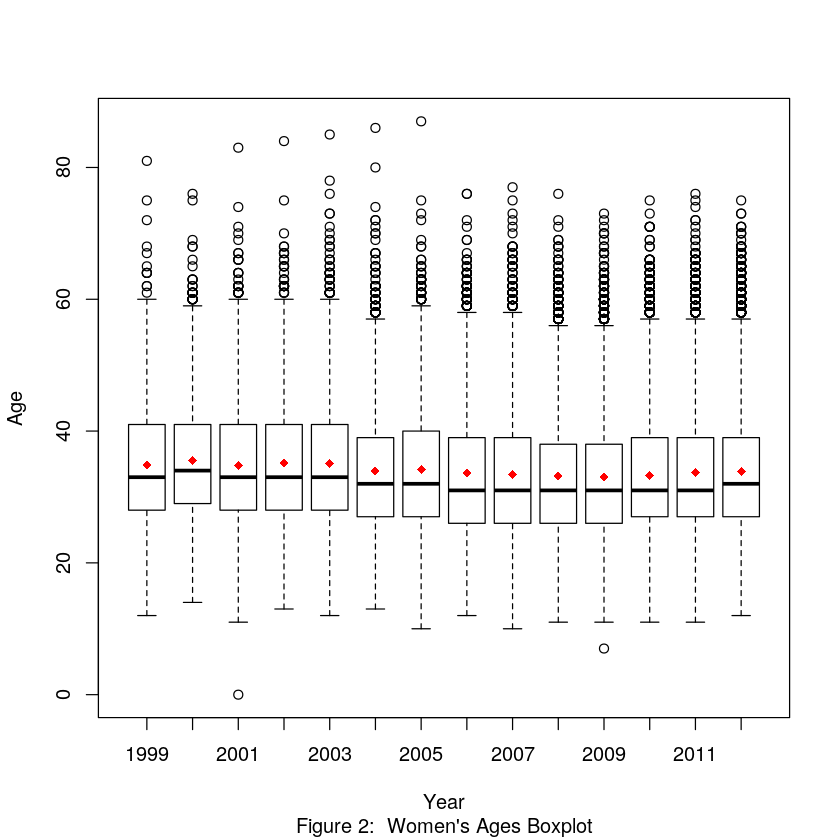

In [21]:
##Check ages
# Women
boxplot(age ~ year, data = combWomen, sub = "Figure 2:  Women's Ages Boxplot", ylab = "Age", xlab = "Year")
means <- tapply(combWomen$age,combWomen$year,function(x) mean(x,na.rm=T))
points(means,col="red",pch=18)

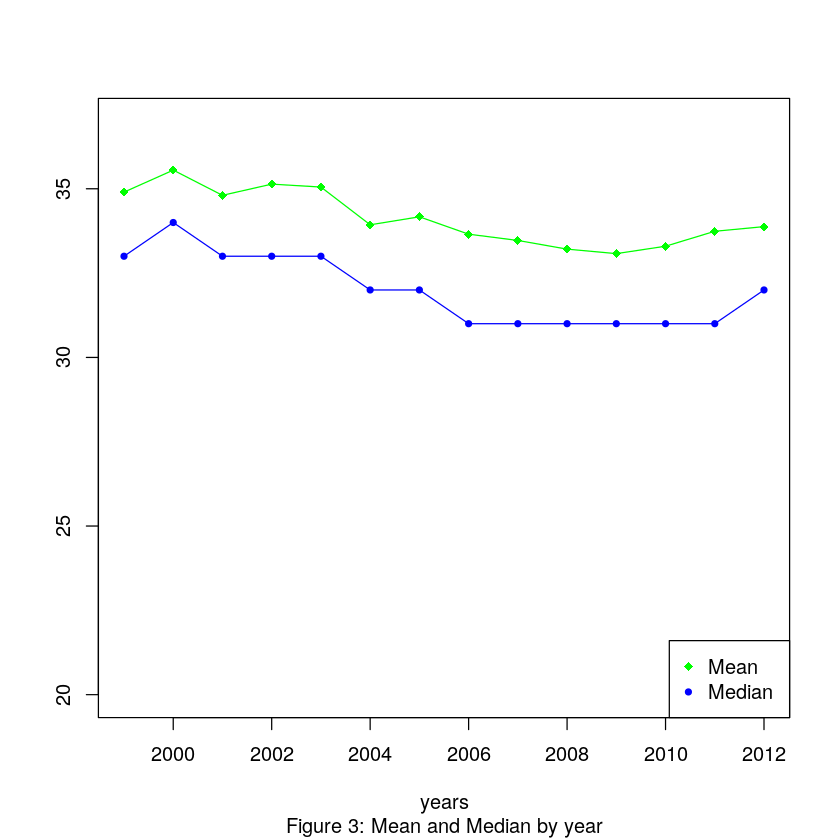

In [26]:
means <- tapply(combWomen$age,combWomen$year,function(x) mean(x,na.rm=T)) # Drop columns with null values
medians <- tapply(combWomen$age,combWomen$year,function(x) median(x,na.rm=T)) # Drop columns with null values
plot(years, means, ylim=c(20, 37), pch=18, type='o', col='green', sub="Figure 3: Mean and Median by year", ylab='')
lines(years, medians, type='o', col='blue', pch=20)
legend("bottomright", legend = c("Mean", "Median"), col = c('green', 'blue'), pch = c(18, 20), text.col = "black")

Figure 3 above shows that median of womens age trends to decrease by year except for year 2000 and 2012. This means that every year, there are more younger womens participating in the race than the previous year except for year 2000 and 2012.
Mean does not show the same trend as from one year to another. In the 14 year period, it increased 6 times and decreased 7 times when compared with previous year mean.

### Conclusion
This was an interesting case study as we reviewed and analyzed the race results from annual Cherry Blossom Ten Mile Run. Our focus for this paper was on the very first step of data analysis which is data cleansing, data preparation before we start modeling and analyzing. We spent time cleaning the women’s race results data files from the Cherry Blossom Ten Mile Run for the years 1999 through 2012. In this data set we observed several issues starting with the file with no header rows and here the data was shifted to the left in this file. The data was cleaned and formatted into a data frame and was prepared for further analysis by creating functions that can be easily be reusable. We used this as a preferred method of cleaning data, as the data cleaning process can be tedious.

### Future work
Using the code in this case study, the dataset for both men and women can be downloaded from the Cherry Blossom website. Once loaded, this code further cleans up the data and format both men and women data in same format. This cleaned data can now be used to perfrom various Machine Learning or Data Science problems like trend analysis, age prediction of the winner of future year, and many more.

### References

Nolan, Deborah, and Duncan Temple Lang. Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. CRC Press, 2015.

### Appendix A - Mens_code.R <a id='Appendix_A'></a><br>
library(stringr)<br>
library(XML)<br>
library(gdata)<br>
<br>
extractSingleItem <- function(strLine, pattern){<br>
#' Extract a single item from a list of strings and that too from the beginning given the pattern in from of regular expression<br>
#'<br>
#' \code{extractSingleItem} returns the list of strings with the first match found for the given pattern and the rest of the string<br>
#'<br>
#' @param strLine - A list of String from which the element patching the pattern is to be extracted.<br>
#' @param pattern - A regular expression or the string to be searched in the strings contained in strLine parameter <br>
#' @return List of lists, i.e. a list of the first matching string from each element of the list strLine and list of the remaining part of string after removing the matched component.<br>
#'<br>
#'<br>
    itemVal <- str_match(strLine, pattern)[1, 1]<br>
    len <- nchar(itemVal)<br>
    <br>
    if (!is.na(itemVal)) {<br>
        loc <- regexpr(itemVal, strLine)<br>
        newStrLine <- substr(strLine, start = loc + len, stop = nchar(strLine))   <br>
    } else {<br>
        newStrLine <- strLine<br>
    }<br>
    <br>
    return (c(itemVal, newStrLine))<br>
}<br>
<br>
parseLine <- function(strLine){<br>
#' Parses the lines from the list of string strLine <br>
#'<br>
#' \code{parseLine} returns a list containing the parsed values of strLine<br>
#'<br>
#' @param strLine - A list of String to be parsed to corresponding column values<br>
#' @return a list containing the parsed values of strLine as place, divTot, num, name, ag, homeTown, gunTime, netTime, pace<br>
#'<br>
#'    <br>
    placeOut <- extractSingleItem(strLine, "\\d+")<br>
    place <- str_trim(placeOut[1])<br>
    newStrLine <- placeOut[2]<br>
    <br>
    divTotOut <- extractSingleItem(newStrLine, "\\d+/\\d+")<br>
    divTot <- str_trim(divTotOut[1])<br>
    newStrLine <- divTotOut[2]<br>
    <br>
    numOut <- extractSingleItem(newStrLine, "\\d+")<br>
    num <- str_trim(numOut[1])<br>
    newStrLine <- numOut[2]<br>
    <br>
    nameOut <- extractSingleItem(newStrLine, "[A-Za-z\\-\\'\\.\\s]+")<br>
    name <- str_trim(nameOut[1])<br>
    newStrLine <- nameOut[2]<br>
    <br>
    agOut <- extractSingleItem(newStrLine, "\\d+")<br>
    ag <- str_trim(agOut[1])<br>
    newStrLine <- agOut[2]<br>
    <br>
    homeTownOut <- extractSingleItem(newStrLine, "([A-Za-z]+[\\s]*)+")<br>
    homeTown <- str_trim(homeTownOut[1])<br>
    newStrLine <- homeTownOut[2]<br>
    <br>
    times <- str_match_all(newStrLine, "\\d+[\\:]{1}\\d+([\\:]{1}\\d+)?[#'|*]*")[[1]]<br>
    gunTime <- str_trim(times[1, 1])<br>
    netTime <- str_trim(times[2, 1])<br>
    pace <- str_trim(times[3, 1])<br>
    <br>
    return (c(place, divTot, num, name, ag, homeTown, gunTime, netTime, pace))<br>
    <br>
}<br>
<br>
extractResTable <- function(url, year = 1999, men = T, file = NULL, saveFileAsTxt = TRUE) {<br>
#' extract results from given cherry blossom url, find preformatted text and return as chr vector<br>
#'<br>
#' \code{extractResTable} returns character vector <br>
#'<br>
#' @param url - URL to the Cherry Blossoms results webpage <br>
#' @param year - Year corresponding to which the url contains the results<br>
#' @param men - T if url has mens results and F if url carries womens results<br>
#' @param file - The file name to be used to save this extracted text<br>
#' @param saveFileAsTxt - TRUE if the data extract is to be saved on the disk otherwise FALSE<br>
#' @return a character vector containing the data extracted from the given URL<br>
#'<br>
#'      <br>
    <br>
#' Parse the url data<br>
    doc <- htmlParse(url)<br>
    <br>
    if (year == 2000) {<br>
#'Get text from 4th font element<br>
#'File is ill-formed so &lt;pre&gt; search doesn't work.<br>
        ff <- getNodeSet(doc, "//font")<br>
        txt <- xmlValue(ff[[4]])<br>
        els <- strsplit(txt, "\r\n")[[1]]<br>
    } else if (year == 2009 & men == T) {#' Special formatting required for 2009 file for men<br>
#'The html for this is nooooo fun<br>
        dp <- getNodeSet(doc, "//div//pre")<br>
        nodeVals <- lapply(dp, xmlValue)<br>
        <br>
        eqIndex <- grep("^===", nodeVals)<br>
        spacerRow <- nodeVals[eqIndex][[1]]<br>
        vecSpacerRow <- str_split(str_trim(spacerRow), "[\\s|Â]+")[[1]]<br>
        <br>
#'Need to adjust Gun Time and Net Time columns b/c they are too short for some of their values<br>
        vecSpacerRow[7] <- paste(vecSpacerRow[7],"=", sep = "")<br>
        vecSpacerRow[8] <- paste(vecSpacerRow[8],"=", sep = "")<br>
        <br>
#'manually type in headers; I know this isn't ideal, but code is only useful for Men's 2009 results anyway<br>
        vecHeaderRow <- c("Place", "Div/Tot", "Num", "Name", "Ag", "Hometown", "Gun Tim", "Net Tim", "Pace")<br>
        <br>
        bodyNodeVals <- nodeVals[(eqIndex + 1):(length(nodeVals) - 2)]<br>
        <br>
        colLens <- sapply(vecSpacerRow, nchar, USE.NAMES = F)<br>
        bodyMat <- t(sapply(bodyNodeVals, parseLine))<br>
        <br>
        preHeadNodeVals <- nodeVals[(1):(eqIndex - 2)]<br>
        vecPreHeadText <- sapply(preHeadNodeVals, gsub, pattern = "Â", replacement = " ")<br>
        vecPreHeadText <- sapply(vecPreHeadText, str_trim)<br>
        <br>
        footerNodeVals <- nodeVals[(length(nodeVals) - 1):(length(nodeVals))]<br>
        vecFooterText <- sapply(footerNodeVals, gsub, pattern = "Â", replacement = " ")<br>
#'footerMat <- t(sapply(vecFooterText, function(x) c(x, rep(" ", 8)), USE.NAMES = F))<br>
        <br>
        dataMat <- rbind(vecHeaderRow, vecSpacerRow, bodyMat, deparse.level = 0)<br>
        <br>
#'write to Txt file<br>
        lapply(vecPreHeadText, write, "temp2009.txt", append = T)<br>
        write.fwf(dataMat, file = "temp2009.txt", width = colLens, colnames = F, append = T)<br>
        lapply(vecFooterText, write, "temp2009.txt", append = T)<br>
        <br>
#'convert contents of txt file to chr vector<br>
        els <- readLines("temp2009.txt")<br>
        file.remove("temp2009.txt")<br>
    }<br>
    else {<br>
#' Read the data within the pre node of the parsed HTML<br>
        preNode <- getNodeSet(doc, "//pre")<br>
        <br>
#' Retrieve entire text from the given url<br>
        txt <- xmlValue(preNode[[1]])<br>
        <br>
#' Considering new line character as \r\n, split the text into individual lines<br>
        els <- strsplit(txt, "\r\n")[[1]]<br>
        <br>
#' If new line character is not \r\n then check for line character as \n<br>
        if(length(els)==1)<br>
            els = strsplit(txt, "\n")[[1]]<br>
    }<br>
    <br>
#' Code to remove any blank lines that might be present<br>
    els <- els[!trimws(els) %in% ""]<br>
    <br>
#' Code the remove the lines beginning with#' and *. These lines are footer lines and does not carry meaningful data <br>
    els <- els[!startsWith(trimws(els) , '#')]<br>
    els <- els[!startsWith(trimws(els) , '*')]<br>
    <br>
#' Save the individual years men and womens data in txt format if saveFileAsTxt parameter is True<br>
    if(saveFileAsTxt){<br>
        if (men == T) {<br>
            subDir <- "MenTxt"<br>
        } else {<br>
            subDir <- "WomenTxt"<br>
        }<br>
<br>
        if (!(is.null(file))) {<br>
            if(!(dir.exists(subDir))) {<br>
                dir.create(subDir)<br>
            } <br>
            writeLines(els, file.path(subDir, file))<br>
        }<br>
    }<br>
    return(els)<br>
}<br>
<br>
<br>
findColLocs <- function(spacerRow) {<br>
#' Find the column locations from a header (spacerRow string) record where columns are separated by spaces <br>
#'<br>
#' \code{findColLocs} returns a list containing the location of spaces in the string contained in parameter spacerRow<br>
#'<br>
#' @param spacerRow - A String from which the location of spaces is to be retrieved.<br>
#' @return a list containing the location of spaces in the string contained in parameter spacerRow. The first element of the list returned is always 0 and the last element is length of the spacerRow string plus one if the last character is not blank.<br>
#'<br>
#'<br>
    spaceLocs <- gregexpr(" ", spacerRow)[[1]]<br>
    rowLength <- nchar(spacerRow)<br>
    <br>
    if (substring(spacerRow, rowLength, rowLength) != " ") {<br>
        return (c(0, spaceLocs, rowLength + 1))<br>
    } else {<br>
        return (c(0, spaceLocs))<br>
    }<br>
}<br>
<br>
<br>
selectCols <- function(colNames, headerRow, searchLocs) {<br>
#' Search for the column names in the header record given the location of all the spaces in the header row and return the locations of columns found. Returns NA is location if colName is not found.<br>
#'<br>
#' \code{selectCols} returns a list containing the header column and the location of the column names mentioned in colNames list.<br>
#'<br>
#' @param colNames - A list of Strings containing all column names to be searched in the header record.<br>
#' @param headerRow - A String in which the presence of each element mentioned in colNames param is to be searched.<br>
#' @param searchLocs - A list containing the location of beginning of every word in the headerrow record.<br>
#' @return a list containing the header row and the starting location of the column names mentioned in colNames list.<br>
#'<br>
#'<br>
    sapply(colNames,<br>
           function(name, headerRow, searchLocs) {<br>
               startPos <- regexpr(name, headerRow)[[1]]<br>
               if (startPos == -1) {<br>
                   return(c(NA, NA))<br>
               }<br>
               <br>
               index <- sum(startPos >= searchLocs)<br>
               c(searchLocs[index] + 1, searchLocs[index + 1])<br>
           },<br>
           headerRow = headerRow, searchLocs = searchLocs)<br>
    <br>
}<br>
<br>
<br>
extractVariables <- function(file, varNames = c("name", "home", "ag", "gun", "net", "time"),<br>
                             year) {<br>
#' Create a data frame which contains the variables given by the varNames parameter and the data is extracted from data contained in the param file which is a list of string.<br>
#'<br>
#' \code{extractVariables} returns a dataframe.<br>
#'<br>
#' @param file - A list of Strings containing all the data records<br>
#' @param varNames - The name of the columns corresponding to which data is contained in file parameter.<br>
#' @param year - year of the result of the cherry blossom race corresponding to which the data is present in the file parameter.<br>
#' @return a data frame with columns as mentioned in the varNames parameter.<br>
#'<br>
#'<br>
<br>
#' Find the index of the row with equal signs<br>
    eqIndex <- grep("^===", file)    <br>
<br>
#' Extract the two key rows and the data (fix men 2006 spacer row)<br>
    spacerRow <- file[eqIndex]<br>
    headerRow <- tolower(file[eqIndex - 1])<br>
<br>
    if (year == 2006){<br>
        locNetTime <- regexpr("net", headerRow)<br>
        spacerRow <- paste(substr(spacerRow, 1, locNetTime - 2), <br>
                           substr(spacerRow, locNetTime, nchar(spacerRow)), "")<br>
    }<br>
<br>
<br>
    body <- file[-c(1:eqIndex)]<br>
<br>
#' Obtain the starting and ending positions of variables<br>
    searchLocs <- findColLocs(spacerRow)<br>
    locCols <- selectCols(varNames, headerRow, searchLocs)<br>
    <br>
    Values <- mapply(substr, list(body), start = locCols[1,], stop = locCols[2,])<br>
    colnames(Values) <- varNames<br>
    <br>
    invisible(Values)<br>
}<br>
<br>
convertTime <- function(charTime){<br>
#' Convert time from h:mm:ss to minutes.<br>
#'<br>
#' \code{convertTime} return time in minutes.<br>
#'<br>
#' @param charTime - Time in h:mm:ss format<br>
#' @return time in minutes, if the format is other than h:mm:ss, then returns NA.<br>
#'<br>
#'    <br>
    timePieces <- strsplit(charTime, ":")<br>
    timePieces <- sapply(timePieces, as.numeric)<br>
    <br>
#'Fix to account for times that are of incorrect format, e.g. "1:30:" <br>
    nbrColons <- lapply(charTime, <br>
                       function(x) {<br>
                         length(gregexpr(":", x)[[1]])<br>
                       })<br>
    <br>
    runTime <- mapply(function(x, y, z){<br>
                  nbrTimePieces <- length(x)<br>
                  if (nbrTimePieces <= y) {<br>
                      return(NA)}<br>
                  else if (nbrTimePieces == 2) {<br>
                      return(x[1] + x[2]/60)}<br>
                  else {<br>
                      return(60*x[1] + x[2] + x[3]/60)}<br>
               }, <br>
               timePieces, <br>
               nbrColons,<br>
               charTime)<br>
    <br>
}<br>
<br>
createDF <- function(Res, year, sex){<br>
#' Create a dataframe containing the data for the given year for men or women.<br>
#'<br>
#' \code{createDF} return a dataframe .<br>
#'<br>
#' @param Res - Mens/Womens race result data for a year<br>
#' @param year - Year corresponding to which data is supplied<br>
#' @param sex - Specifies if the data is for men or women<br>
#' @return a dataframe which contains data for men/women for the year mentioned.<br>
#'<br>
#'    <br>
<br>
#'Determine which time to use<br>
    useTime <- if(!is.na(Res[1, "net"])) {<br>
        Res[, "net"]<br>
    } else if(!is.na(Res[1, "gun"])) {<br>
        Res[, "gun"]<br>
    } else {<br>
        Res[, "time"]}<br>
    <br>
#'Remove#' and * and blanks from time<br>
    useTime <- gsub("[#'\\*[:blank:]]", "", useTime)<br>
    <br>
#'Drop rows with no time<br>
    Res <- Res[useTime != "", ]<br>
    <br>
    runTime <- convertTime(useTime[useTime != ""])<br>
    <br>
#'convertTime returns NA for invalid run times; drop these records and print<br>
#'message about record(s) dropped<br>
    if(sum(is.na(runTime)) > 0){<br>
      print(paste("Dropping the following records in year", year, "for", <br>
                  ifelse(sex == "M", "Men", "Women"), <br>
                  "due to invalid times", sep = " "))<br>
      <br>
      print(Res[is.na(runTime), ])     <br>
    }<br>
<br>
#' Create data frame for every year<br>
    Results <- data.frame(year = rep(year, nrow(Res)),<br>
                          sex = rep(sex, nrow(Res)),<br>
                          name = Res[ , "name"],<br>
                          home = Res[ , "home"],<br>
                          age = as.numeric(Res[ , "ag"]), <br>
                          runTime = runTime,<br>
                          stringsAsFactors = F)<br>
    <br>
    invisible(Results)<br>
                        <br>
}<br>
<br>
<br>
printRawTableRecords <- function(rawFile, indexToPrint, year, headerRcd=NA) {<br>
#' Print records from the rawFile which includes the header record along with the records at the given indexes<br>
#'<br>
#' \code{printRawTableRecords} returns NULL. This function is just to print some records<br>
#'<br>
#' @param rawFile - A file (list of Strings) that contain the raw cherry blossom results data<br>
#' @param indexToPrint - Data Indexes to print <br>
#' @param year - Year corresponding to which data is in the rawFile <br>
#' @param headerRcd - String containing the header information, NULL if header is to be found in the rawFile, should be specified only when there is not header in the raw file.<br>
#' @return NULL. This function is to be used for print purpose only <br>
#'<br>
#'<br>
    if(is.na(headerRcd)){<br>
#' Find the index of the row with equal signs<br>
        eqIndex <- grep("^===", rawFile)    <br>
<br>
#' Extract the two key rows and the data (fix men 2006 spacer row)<br>
        spacerRow <- rawFile[eqIndex]<br>
        headerRow <- tolower(rawFile[eqIndex - 1])<br>
        if (year == 2006){<br>
            locNetTime <- regexpr("net", headerRow)<br>
            spacerRow <- paste(substr(spacerRow, 1, locNetTime - 2), substr(spacerRow, locNetTime, nchar(spacerRow)), "")<br>
        }<br>
<br>
        body <- rawFile[-c(1:eqIndex)]<br>
<br>
    } else {<br>
        spacerRow <- strrep('=', nchar(headerRcd))<br>
        headerRow <- tolower(headerRcd)<br>
        body <- rawFile<br>
        eqIndex <- 0<br>
    }<br>
    <br>
    cat(headerRow, sep='\n')<br>
    cat(spacerRow, sep='\n')<br>
    for(index in indexToPrint){<br>
        cat(body[index], sep='\n')<br>
    }<br>
}